In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

%matplotlib inline

In [3]:
pwd

'/media/dhanushkaw/One Touch/AA_inner_membrane_simulations/5LPS_rep1_20PMB1s_backmapped/Notebooks'

In [4]:
sys.path.insert(0,os.path.abspath('../../../Analysis_scripts'))
import contacts                                               

In [5]:
sns.set_style('white')
sns.set_style("ticks")
plt.rcParams['font.size']='16'
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [6]:
structure="../Trajectories_and_tprs/No_solvent_CAs.tpr"
trajectory="../Trajectories_and_tprs/No_solvent_CAs.xtc"
folder="../PMB1_lipid_contacts/"


In [7]:
PMB1_atoms ="(resname PMB and not ((resid 1833:2020) or (resid 2209:2396) or (resid 2961:3148) or (resid 3535:3712) or (resid 3713:3900) or (resid 3901:4088) or (resid 4465:4652)))"

Core_atoms='(resname RAMP and name C C1 C2 C3 C4 C5 C6 C7 C8 CT O O2 O3 O4 O5 O6 O7 O8 P4 OP42 OP43 OP44 N)'
Core_atoms_Hs="name H* and bonded (resname RAMP and name O6 C6 C4 O4 C3 O3 C2 O2 C1 N C CT O P4 OP42 OP43 OP44 C7 O7 C8 O8)"
Inner_core_phosphates='(resname RAMP and name P4 OP42 OP43 OP44)'

LipidA_atoms ="resname RAMP and (name CA1 CA2 CA3 CA4 CA5 CA6 CB1 CB2 CB3 CB4 CB5 CB6 OA1 OA3 OA5 OA6 OB4 OB5 OPA2 OPA3 OPA4 OPB2 OPB3 OPB4 NA2 NB2 PA PB)"
LipidA_atoms_Hs="(name H* and bonded (resname RAMP and (name CA1 CA2 CA3 CA4 CA5 CA6 CB1 CB2 CB3 CB4 CB5 CB6 OA1 OA3 OA5 OA6 OB4 OB5 OPA2 OPA3 OPA4 OPB2 OPB3 OPB4 NA2 NB2 PA PB)))"
LipidA_phosphates="resname RAMP and (name PA PB OPA2 OPA3 OPA4 OPB2 OPB3 OPB4 OA1 OB4)"

Acyl_tail_atoms ='(resname RAMP and name C11 C12 C13 C14 C15 C16 C17 C18 C19 C110 C111 C112 C113 C114 C31 C32 C33 C34 C35 C36 C37 C38 C39 C310 C311 C312 C313 C314 C61 C62 C63 C64 C65 C66 C67 C68 C69 C610 C611 C612 C51 C52 C53 C54 C55 C56 C57 C58 C59 C510 C511 C512 C513 C514 C71 C72 C73 C74 C75 C76 C77 C78 C79 C710 C711 C712 C713 C714 C81 C82 C83 C84 C85 C86 C87 C88 C89 C810 C811 C812 C813 C814)'
Acyl_tail_atoms_H='name H* and bonded (resname RAMP and name C11 C12 C13 C14 C15 C16 C17 C18 C19 C110 C111 C112 C113 C114 C31 C32 C33 C34 C35 C36 C37 C38 C39 C310 C311 C312 C313 C314 C61 C62 C63 C64 C65 C66 C67 C68 C69 C610 C611 C612 C51 C52 C53 C54 C55 C56 C57 C58 C59 C510 C511 C512 C513 C514 C71 C72 C73 C74 C75 C76 C77 C78 C79 C710 C711 C712 C713 C714 C81 C82 C83 C84 C85 C86 C87 C88 C89 C810 C811 C812 C813 C814)'
                                
RAMP_atoms ='(resname RAMP and not name H*) and (around 10 global (resname PMB  and not ((resid 1833:2020) or (resid 2209:2396) or (resid 2961:3148) or (resid 3535:3712) or (resid 3713:3900) or (resid 3901:4088) or (resid 4465:4652))))'
POPE_atoms ='(resname POPE and not name H*) and (around 10 global (resname PMB  and not ((resid 1833:2020) or (resid 2209:2396) or (resid 2961:3148) or (resid 3535:3712) or (resid 3713:3900) or (resid 3901:4088) or (resid 4465:4652))))'
POPG_atoms ='(resname POPG and not name H*) and (around 10 global (resname PMB  and not ((resid 1833:2020) or (resid 2209:2396) or (resid 2961:3148) or (resid 3535:3712) or (resid 3713:3900) or (resid 3901:4088) or (resid 4465:4652))))'

Phosphates='(resname RAMP and name PA PB) or (resname POPE POPG and name P)'
Protein_atoms = "protein"

In [ ]:
PMB1_RAMP=contacts.Intermolecular_contacts(tpr=structure,traj=trajectory,saving_folder=folder,selA=PMB1_atoms,selB=RAMP_atoms,step=10,selname="PMB1_RAMP",proximity=4.0,phosphates=Phosphates,update=True)
Times,PMB1_RAMP_contacts=PMB1_RAMP.Contact_calculator()


29


  0%|          | 0/5000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
PMB1_Upper_POPE_end=contacts.Intermolecular_contacts(tpr=structure,traj=trajectory,saving_folder=folder,selA=PMB1_atoms,selB=POPE_atoms,step=10,selname="PMB1_POPE",proximity=4.0,phosphates=Phosphates,update=True)
Times,PMB1_Upper_POPE_end_contacts=PMB1_Upper_POPE_end.Contact_calculator()

166


  0%|          | 0/5000 [00:00<?, ?it/s]

In [8]:
PMB1_Upper_POPG=contacts.Intermolecular_contacts(tpr=structure,traj=trajectory,saving_folder=folder,selA=PMB1_atoms,selB=POPG_atoms,step=10,selname="PMB1_POPG",proximity=4.0,phosphates=Phosphates,update=True)
Times,PMB1_Upper_POPG_contacts=PMB1_Upper_POPG.Contact_calculator()

37


  0%|          | 0/5000 [00:00<?, ?it/s]

In [15]:
PMB1_Core=contacts.Intermolecular_contacts(tpr=structure,traj=trajectory,saving_folder=folder,selA=PMB1_atoms,selB=f"({Core_atoms})",step=10,selname="PMB1_Core",proximity=4.0,phosphates=Phosphates)
Times,PMB1_Core_contacts=PMB1_Core.Contact_calculator()


31


  0%|          | 0/5000 [00:00<?, ?it/s]

In [16]:
PMB1_Inner_core_phosphates=contacts.Intermolecular_contacts(tpr=structure,traj=trajectory,saving_folder=folder,selA=PMB1_atoms,selB=Inner_core_phosphates,step=10,selname="PMB1_Inner_core_phosphates",proximity=4.0,phosphates=Phosphates)
Times,PMB1_Inner_core_phosphates_contacts=PMB1_Inner_core_phosphates.Contact_calculator()

31


  0%|          | 0/5000 [00:00<?, ?it/s]

In [17]:
PMB1_LipidA=contacts.Intermolecular_contacts(tpr=structure,traj=trajectory,saving_folder=folder,selA=PMB1_atoms,selB=f"({LipidA_atoms}) or ({LipidA_atoms_Hs})",step=10,selname="PMB1_LipidA",proximity=4.0,phosphates=Phosphates)
Times,PMB1_LipidA_contacts=PMB1_LipidA.Contact_calculator()

31


  0%|          | 0/5000 [00:00<?, ?it/s]

In [18]:
PMB1_LipidA_phosphates=contacts.Intermolecular_contacts(tpr=structure,traj=trajectory,saving_folder=folder,selA=PMB1_atoms,selB=LipidA_phosphates,step=10,selname="PMB1_LipidA_phosphates",proximity=4.0,phosphates=Phosphates)
Times,PMB1_LipidA_phosphates_contacts=PMB1_LipidA_phosphates.Contact_calculator()

31


  0%|          | 0/5000 [00:00<?, ?it/s]

In [19]:
PMB1_Acyl_tail=contacts.Intermolecular_contacts(tpr=structure,traj=trajectory,saving_folder=folder,selA=PMB1_atoms,selB=f"({Acyl_tail_atoms}) or ({Acyl_tail_atoms_H})",step=10,selname="PMB1_Acyl_tail",proximity=4.0,phosphates=Phosphates)
Times,PMB1_Acyl_tail_contacts=PMB1_Acyl_tail.Contact_calculator()

31


  0%|          | 0/5000 [00:00<?, ?it/s]

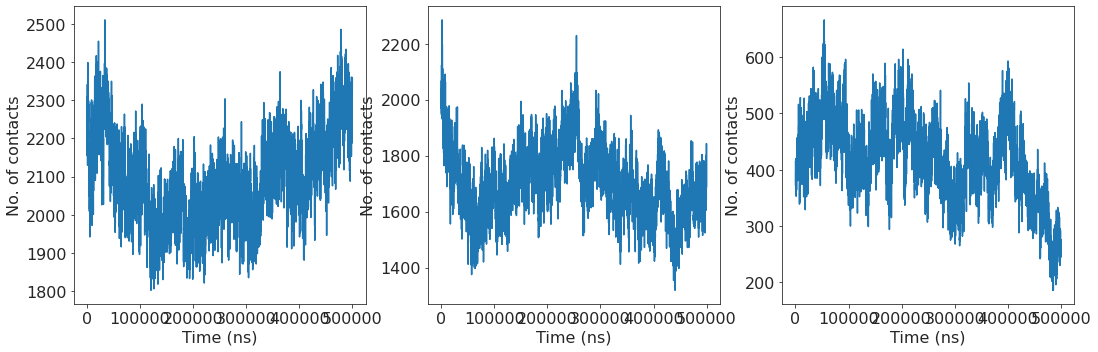

In [22]:
fig, ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))

plt.tight_layout()

# RAMP - 541 atoms overall, 258 heavy atoms
# POPE - 125 atoms overall
# POPG - 127 atoms overall

ax[0].plot(Times, PMB1_RAMP_contacts)
ax[1].plot(Times, PMB1_Upper_POPE_end_contacts)
ax[2].plot(Times, PMB1_Upper_POPG_contacts)

for i in ax[0],ax[1],ax[2]:
    i.set_xlabel('Time (ns)')
    i.set_ylabel('No. of contacts')



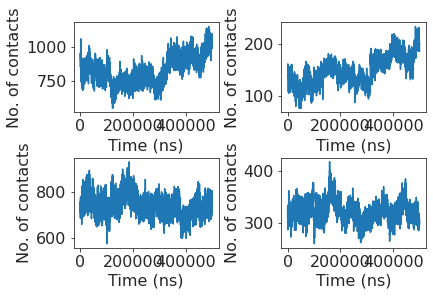

In [21]:
fig1, ax1 = plt.subplots(nrows=2, ncols=2)

plt.tight_layout()

ax1[0][0].plot(Times,PMB1_Core_contacts)
ax1[0][1].plot(Times,PMB1_Inner_core_phosphates_contacts)
ax1[1][0].plot(Times,PMB1_LipidA_contacts)
ax1[1][1].plot(Times,PMB1_LipidA_phosphates_contacts)

for i in ax1[0][0],ax1[0][1],ax1[1][0],ax1[1][1]:
    i.set_xlabel('Time (ns)')
    i.set_ylabel('No. of contacts')


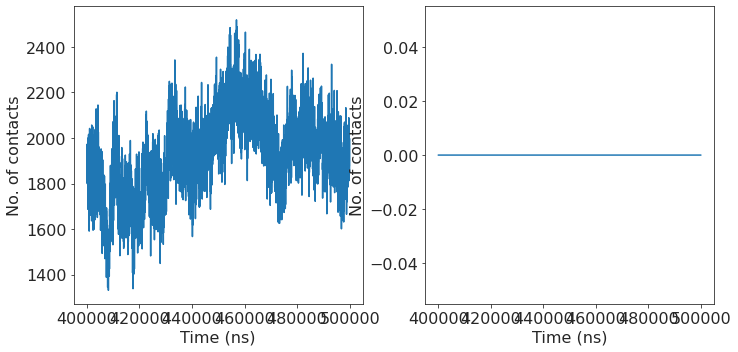

In [15]:
fig2,ax2=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
plt.tight_layout()

ax2[0].plot(Times,PMB1_Acyl_tail_contacts)
ax2[1].plot(Times,PMB1_Protein_contacts)

for i in ax2[0],ax2[1]:
    i.set_xlabel('Time (ns)')
    i.set_ylabel('No. of contacts')
    
